In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *

In [2]:
n=5
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(1e6),59304(1e8),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5_hard()
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


In [40]:
index,value=0,10
for i in tqdm(range(150000), desc="Training Progress"):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=500
    _,__=test_row(A=A,epochs=50,if_plot=False)
    if __ > value and _ < 2 and __ <1e7:
        index,value=i,__
print(index,value)
_,__=test_row(get_xinmeng_like_matrix(n,seed=index).T)
print(f"{_:.4e}, {__:.4e}")

Training Progress: 100%|██████████| 150000/150000 [00:37<00:00, 4006.77it/s]

85395 1906832.5293241686
1.7891e+00, 1.9068e+06


<font color=blue>数据量大，均匀分配，数据异质性小</font>

选取充分稀疏的拓扑

但实验表明，在均匀分配的数据上，Sum和Diag表现（最优的lr下）地差不多

In [3]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(1e6),59304(1e8),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()
#A=0.6*A+0.4*I
""" A=R 
B=get_B(A=A,u=2*n,n=n) """
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


异质性小的时候，Pull Sum可以达到极高正确率 97%

Training Progress: 100%|██████████| 500/500 [00:15<00:00, 32.03it/s, accuracy=93.6300000000%, epoch=500, loss=0.3094530761]


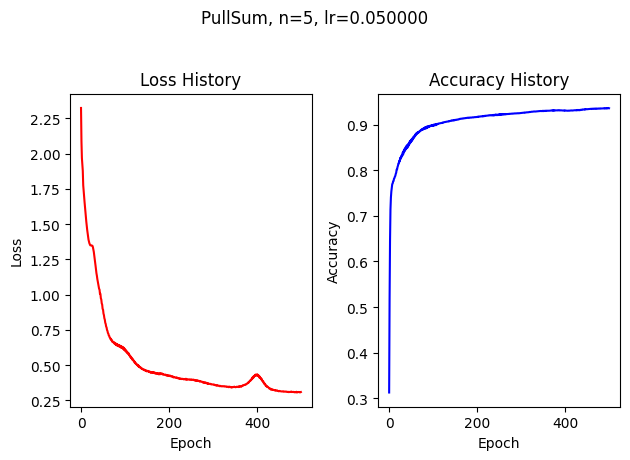

In [4]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=500,lr=(5e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   0%|          | 2/3000 [00:00<04:36, 10.85it/s, accuracy=10.2700000000%, epoch=2, loss=2.3434565067]

Training Progress: 100%|██████████| 3000/3000 [04:25<00:00, 11.28it/s, accuracy=96.8600000000%, epoch=3000, loss=1.1993674427]


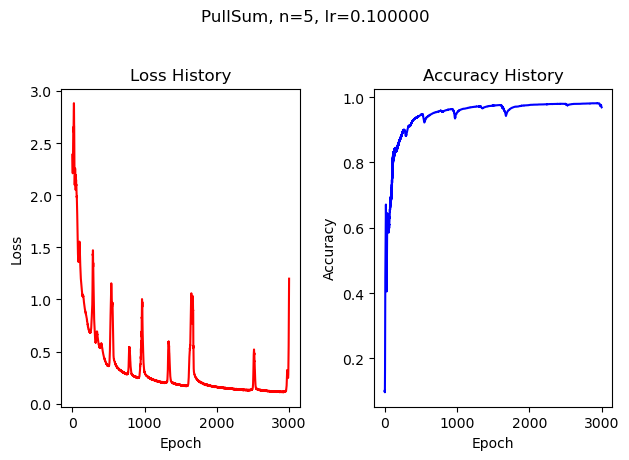

In [6]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_5layer_1,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=3000,lr=(1e-1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   1%|          | 8/1500 [00:00<00:46, 32.07it/s, accuracy=15.6100000000%, epoch=11, loss=3896363.1931640627] 

Training Progress: 100%|██████████| 1500/1500 [00:43<00:00, 34.15it/s, accuracy=89.9500000000%, epoch=1500, loss=25396.2634765625]


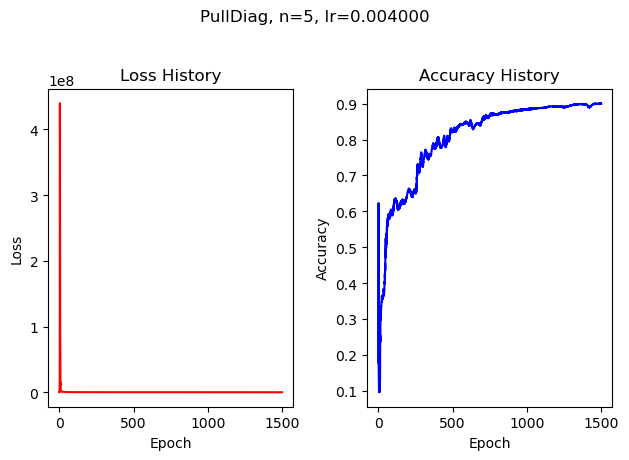

In [13]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(2e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

<font color=blue>如果选取异质性很大的数据分布</font>

Sum: lr=0.1最好

In [36]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(1e6),59304(1e8),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5_hard()
#A=0.6*A+0.4*I
""" A=R 
B=get_B(A=A,u=2*n,n=n) """
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


Training Progress: 100%|██████████| 1500/1500 [02:06<00:00, 11.82it/s, accuracy=87.3100000000%, epoch=1500, loss=0.2000942975]


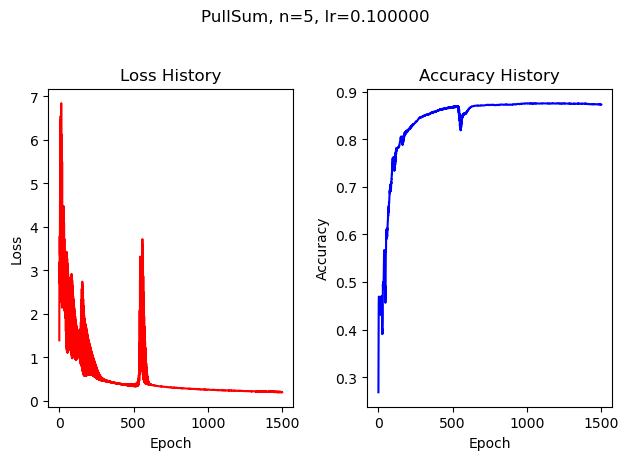

In [38]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(0.1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   0%|          | 0/400 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 400/400 [00:33<00:00, 11.80it/s, accuracy=40.2500000000%, epoch=400, loss=1295790.1000000001]


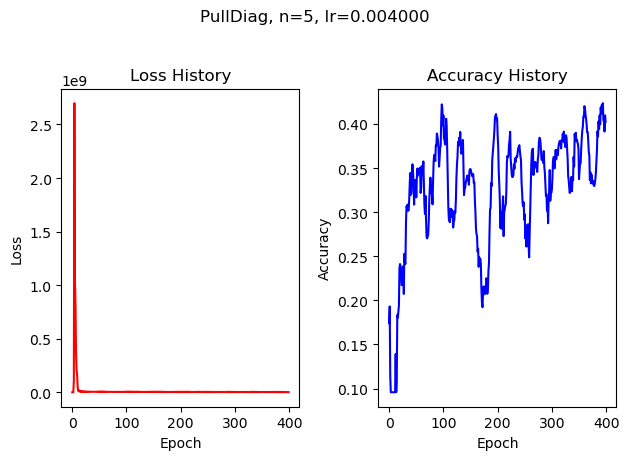

In [40]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=400,lr=(2e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)